In [1]:
from IPython.display import Image

**Dynamic Pattern** : 시간, 변수 등이 추가되어 정적 패턴의 궤적이 하나의 패턴을 이루는 것  

**DTW** : 시간, 속도에 따라 변하는 서로 다른 길이의 동적 패턴 간의 유사도 판별에 이용되는 알고리즘  

- DTW의 문제점  
(1) Singularites : 한 패턴의 대응점 여러 개가 다른 패턴의 대응점 1개에 집중됨  
(2) 패턴의 대응이 올바른지 알 수 없음  

문제 해결을 위해 DDTW(Derivative Dynamic Time Warping)이 제안됨. DDTW는 Exponential Smoothing을 쓰는데, 최근 시점에 가중치가 높으므로 제약조건을 갖고 있음.  

2nd 미분 연산자 중 Laplace of Gaussian을 써서 이 문제를 해결할 수 있다는 것이 제안됨.

# 기존의 방법

### DTW Algorithm

$$
d(w_k) =  d(q_k, c_k) = \left | [Q(q_k) - C(c_k)] \right | \quad (1)
$$

위와 같은 대응 경로를 최소화하는 값을 아래 식 (2)로 표현

$$
DTW(Q, C) = min \frac{1}{K} \sqrt{\sum_{k=1}^K W_K}, \quad W_k = {w_1, w_2, \cdots, w_k} \quad (2)
$$

이때 대응경로는 아래 식 (3)과 같이 표현

$$
\gamma(i, j) = d(q_i, c_i) + min \; \gamma(i-1, j-1), \gamma(i-1,j), \gamma(i, j-1)
$$

DTW는 여기서 두 패턴의 누적 거리를 최소화하는 최적 경로 $m = W(n)$을 찾는 방법.

### Slope Weighting

Singularity 해결을 위한 기존의 방법은 대응 관계 계산 시, 경사에 가중치를 적용하는 것.

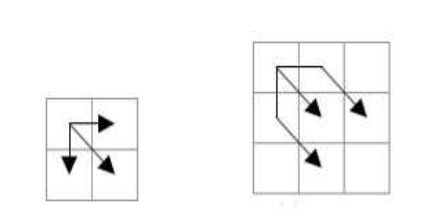

In [2]:
Image("C:/Users/jy990/Study/Dynamic time warping/Image/3.1.png")

### DDTW

DTW는 대응되는 굴곡의 높낮이가 유사한 경우 가장 좋은 결과를 가짐. 하지만 굴곡 깊이가 다르면 1개의 y축 값을 기준으로 하는 DTW 알고리즘에서는 다른 위치를 가리키는 문제가 발생함.  

예를 들어 상승점과 하강점을 대응 경로로 판단할 때, DTW는 단 두 점의 관계만 가지고 판단하기에 잘못된 경로를 생성함.  

반면 DDTW는 1차 미분연산자를 사용함으로써 이 문제를 해결함. DDTW는 패턴에 가장 먼저 Exponential Smoothing을 해서 전처리를 수행한 다음 대응 경로를 계산하는데, 대응 관계를 1차 미분 연산자를 이용해 DTW에 적용함. 즉, 두 동적 패턴 $P = p_1, p_2, \cdots, p_m$, $Q = q_1, q_2, \cdots, q_m$에 대해

$$
X_{p_1} = p_1, X_{q_1} = q_1 \quad (4)
$$

위와 같이 초깃값을 지정, 각 패턴에 대해 아래 식 (5)를 이용해 시점 k에서의 Exponential Smoothing을 동적 패턴에 적용함

$$
S_{p_k} = \alpha X_{p_k} + (1-\alpha) X_{p_{k-1}} \quad 0 \leq \alpha \leq 1, \; 2 \leq k \leq m \quad (5)
$$

$k$번째 $P$와 $Q$의 대응 관계 $d$는 아래 식 (6)과 같이 정의됨

$$
D_k[q] = \frac{(q_k - q_{k-1}) + ((q_{k+1} - q_{k-1})/2)}{2} \quad (6)
$$

이때 누적 경로는 식 (7)과 같은 Slope Weighting을 사용함

$$
\gamma(i,j) = d(q_i, c_i) + min \gamma(i-1, j-1), \gamma(i-2, j), \gamma(i, j-2)
$$

# 2차 미분연산자 활용한 DTW

그러나 DDTW도 최근 자료에 가중치가 높은 특성상 반복되는 규칙이나 잡음으로 인해 전혀 다른 패턴으로 인식해버리는 문제가 발생함.  

1차 미분연산자를 이용한 대응경로 판단법은 불규칙적이거나 길이가 긴 noise에 대해 민감한 반응을 보이는 문제가 있음.  

따라서 2차 미분 연산자중 하나인 $LoG$(Laplacian of Gaussian)을 적용해 Gaussian Smoothing을 한 뒤, Laplacian 연산, 2차 미분 연산을 DTW에 적용하고자 함.  

$$
h(P) = \nabla^2 [g(P) \cdot P], \quad \nabla : Lapacian, \; g : e^{-\frac{P^2}{2\sigma^2}} (8)
$$

즉,

$$
\nabla^2 h(P) = \left ( \frac{p^2 - \sigma^2}{\sigma^4} \right ) e^{-\frac{P^2}{2\sigma^2}} \quad (9)
$$

이게 $LoG$ 연산. 이 결과를 DTW에 적용해 대응 경로 값 $W_k$를 계산하기 위해 Slope Weighting을 사용함.  

$$
\gamma(i,j) = d(q_i, c_i) + min \gamma(i-1, j-1), X_\gamma (i-2, j), X_\gamma (i, j-2)
$$

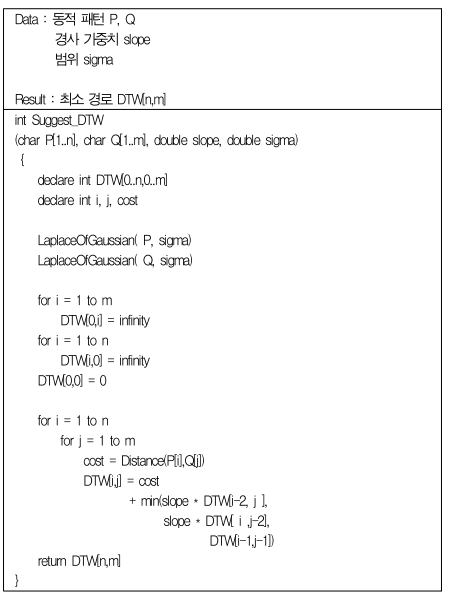

In [3]:
Image("C:/Users/jy990/Study/Dynamic time warping/Image/3.2.png")